# Example of a spin test between two correlated and uncorrelated continous maps on the unfolded hippocampus

In [1]:
import matplotlib.pyplot as plt
import nibabel as nib
import hippomaps as hm
import numpy as np
from lapy import TriaMesh
from eigenstrapping import geometry, fit, datasets
from pathlib import Path
resourcesdir = '/export03/data/opt/hippomaps/resources'


/export03/data/opt/venv/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


/export03/data/opt/venv/lib/python3.8/site-packages/brainspace/plotting/base.py:287: UserWarning: Interactive mode requires 'panel'. Setting 'interactive=False'
  warnings.warn("Interactive mode requires 'panel'. "


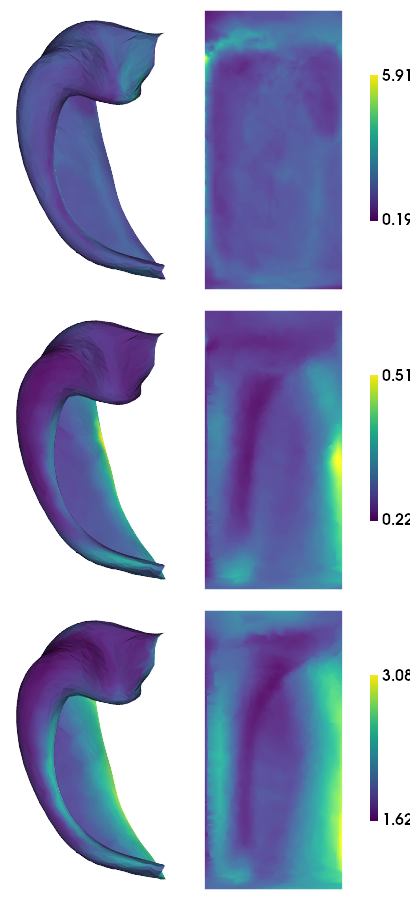

In [2]:
# Test data
den = '1mm'
thickness = '../example_data/thickness_midsurf_L_mean.shape.gii'
NDI = '../example_data/NDI_midsurf_L_mean.shape.gii'
T1divT2 = '../example_data/T1wdivT2w_midsurf_L.shape.gii'
#Load data for visualization only
thickdata = nib.load(thickness).agg_data().flatten()
NDIdata = nib.load(NDI).agg_data().flatten()
T1divT2data = nib.load(T1divT2).agg_data().flatten()

hm.plotting.surfplot_canonical_foldunfold(np.vstack((thickdata,NDIdata,T1divT2data)).T, hemis=['L'], labels=['hipp'], den=den, unfoldAPrescale=True, embed_nb=True, color_bar='right', share='row')

## Spin test permutation

Note that these permutation tests rely on sampling to a regular 2D grid (in unfolded space). This is done automatically in each function, but here we also visualize the data as such

### Run spin test (two highly correlated maps)

In [3]:
[metricnull,permutedimg,pval,r_obs] = hm.stats.spin_test(T1divT2,NDI,label='hipp',nperm=50,den=den,metric='spearmanr')

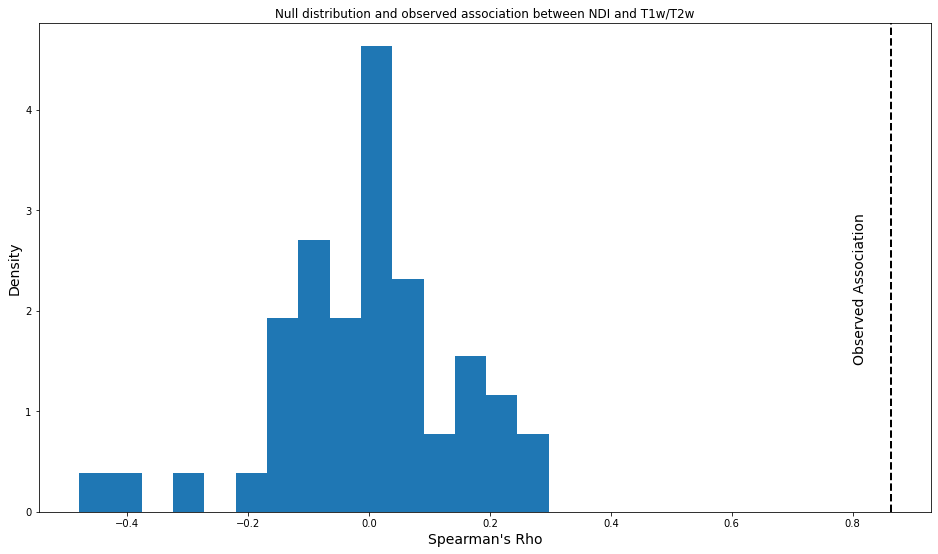

In [4]:
print(f'p-value between NDI and T1w/T2w = {pval:.6}')
fig, ax = plt.subplots(figsize=(16,9))
ax.hist(metricnull,bins=15,density=True)
ax.axvline(r_obs, lw=2, ls='--', color='k')
plt.text(0.8,1.5,'Observed Association',rotation=90,fontsize=14)
plt.xlabel("Spearman's Rho",fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.title('Null distribution and observed association between NDI and T1w/T2w')
plt.show()

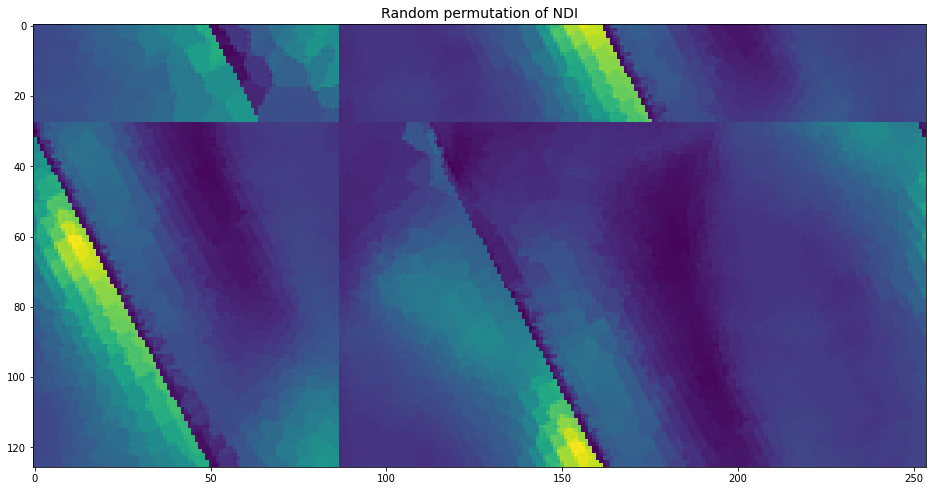

In [5]:
#Visualize a random permuted unfolded map
fig, ax = plt.subplots(figsize=(16,9))
ax.imshow(permutedimg[:,:,2])
plt.title('Random permutation of NDI',fontsize=14)
plt.show()

### Spin test (two uncorrelated maps)

In [6]:
[metricnull,permutedimg,pval,r_obs] = hm.stats.spin_test(thickness,NDI,label='hipp',nperm=50,den=den,metric='spearmanr')

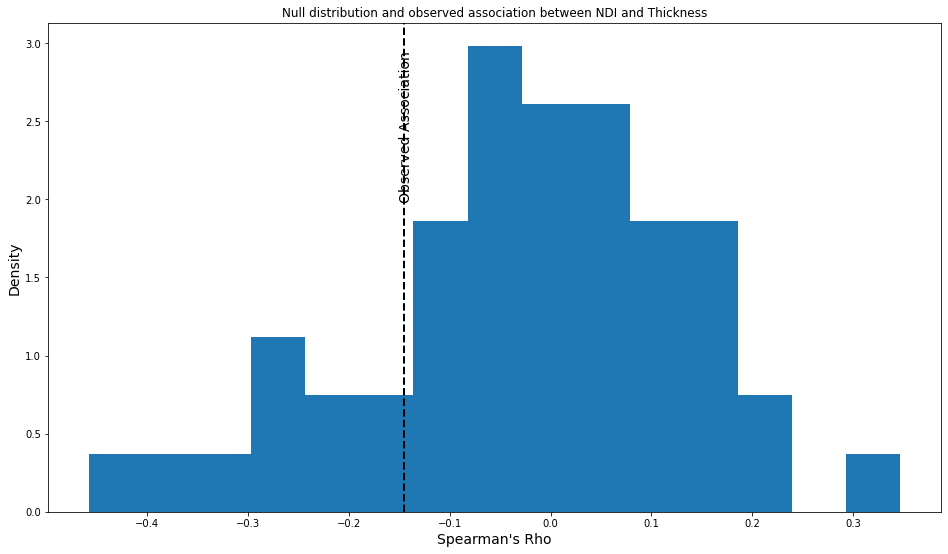

In [7]:
print(f'p-value between NDI and Thickness = {pval:.6}')
fig, ax = plt.subplots(figsize=(16,9))
ax.hist(metricnull,bins=15,density=True)
ax.axvline(r_obs, lw=2, ls='--', color='k')
plt.text(-0.15,2,'Observed Association',rotation=90,fontsize=14)
plt.xlabel("Spearman's Rho",fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.title('Null distribution and observed association between NDI and Thickness')
plt.show()

## Moran spectral randomization

In [8]:
[metricnull,permutedimg,pval,r_obs] = hm.stats.moran_test(thickness,NDI,label='hipp',nperm=50,den=den, metric='spearmanr')

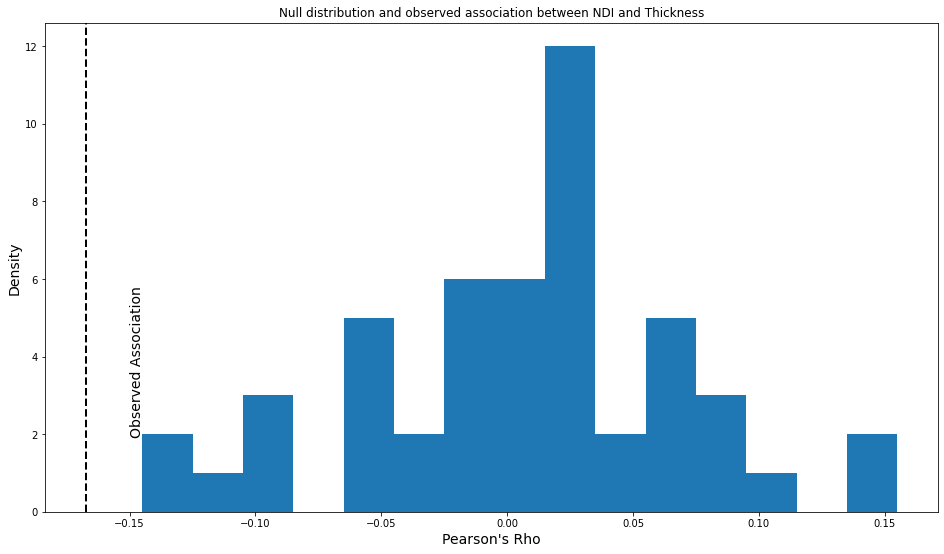

In [9]:
print(f'p-value between NDI and Thickness = {pval:.6}')
fig, ax = plt.subplots(figsize=(16,9))
ax.hist(metricnull,bins=15,density=True)
ax.axvline(r_obs, lw=2, ls='--', color='k')
plt.text(-0.15,2,'Observed Association',rotation=90,fontsize=14)
plt.xlabel("Pearson's Rho",fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.title('Null distribution and observed association between NDI and Thickness')
plt.show()

This method is less conservative, and suffersfrom a higher false-positive rate

## Eigenstrapping

Awesome new tool at https://www.biorxiv.org/content/10.1101/2024.02.07.579070v1.abstract

Koussis, N. C., Pang, J. C., Jeganathan, J., Paton, B., Fornito, A., Robinson, P. A., ... & Breakspear, M. (2024). Generation of surrogate brain maps preserving spatial autocorrelation through random rotation of geometric eigenmodes. bioRxiv, 2024-02.

In [10]:
[metricnull,permutedimg,pval,r_obs] = hm.stats.eigenstrapping(thickdata,NDIdata,label='hipp',nperm=50,den=den, metric='spearmanr')

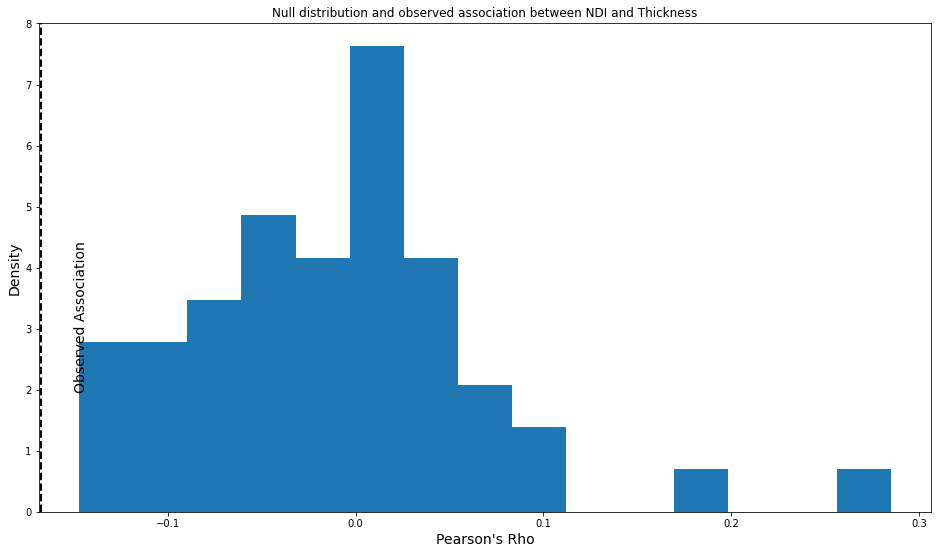

In [11]:
print(f'p-value between NDI and Thickness = {pval:.6}')
fig, ax = plt.subplots(figsize=(16,9))
ax.hist(metricnull,bins=15,density=True)
ax.axvline(r_obs, lw=2, ls='--', color='k')
plt.text(-0.15,2,'Observed Association',rotation=90,fontsize=14)
plt.xlabel("Pearson's Rho",fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.title('Null distribution and observed association between NDI and Thickness')
plt.show()